### UAS PEMBELAJARAN MESIN
Oleh:
Amelia Marshanda S/2041720041

Annisa Fitri Yuliandra/2041720123

Inda Khoirun Nisak/2041720020

Jasmin Salsabila Arifah/2041720097

Rofika Nur 'Aini/2041720099

**SOAL**

Pada proyek tugas besar ini, Anda diminta untuk membuat model pembelajaran mesin untuk kasus sentimen analisis menggunakan data dari twitter. Ketentuan dari proyek adalah sebagai berikut, 
 
1.	Lakukan scrapping data twitter pada akun College Menfest (@collegemenfess) sejumlah 5000 twit. Anda dapat menggunakan library Twint atau API resmi dari twitter. (15 poin) 
 
2.	Buatlah model clustering berdasarkan data tersebut. Jumlah cluster adalah 3 yang mewakili 3 sentimen, yaitu, positif, netral, dan negatif. Evaluasi model yang Anda buat. (30 poin) 
 
3.	Setelah cluster didapatkan, lakukan proses labeling terhadap cluster yang dihasilkan sesuai dengan sentiment yang ditentukan. Pada proses ini Anda dapat melakukannya dengan metode expert judgement atau asumsi kelompok. 
(10 poin) 
 
4.	Setelah proses labeling dilakukan, buatlah model klasifikasi dengan menggunakan data yang sudah Anda beri label. Evaluasi model yang Anda buat (akurasi dan presisi). (30 poin) 
 
5.	Lakukan prediksi sentimen data twitter yang baru (500 twit). Evaluasi akurasi dari model berdasarkan data baru. 
(15 poin)

In [1]:
# Install Package
%pip install twint
%pip install nest_asyncio

# Fix Issue with twint 20.1.20 from pip --> upgrade to 20.1.21 directly from git
#%pip install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import twint
import nest_asyncio
nest_asyncio.apply()

# inisiasi obyek
c = twint.Config()

# config scrap
c.Username = "collegemenfess"
c.Since = "2022-12-05"
c.Until = "2022-12-11"
c.Limit = 5000
c.Store_csv = True
c.Output = "colle_scrap.csv"

# run scrap
twint.run.Search(c)

In [1]:
import pandas as pd
import numpy as np

cs = pd.read_csv('colle_scrap.csv')
cs

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1601728382596964352,1601728382596964352,2022-12-11 06:59:39 SE Asia Standard Time,2022-12-11,06:59:39,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1601727590469111808,1601727590469111808,2022-12-11 06:56:30 SE Asia Standard Time,2022-12-11,06:56:30,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1601726312796033024,1601726312796033024,2022-12-11 06:51:26 SE Asia Standard Time,2022-12-11,06:51:26,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1601726216561491968,1601726216561491968,2022-12-11 06:51:03 SE Asia Standard Time,2022-12-11,06:51:03,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1601725424429453313,1601725424429453313,2022-12-11 06:47:54 SE Asia Standard Time,2022-12-11,06:47:54,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1600176140810739726,1600176140810739726,2022-12-07 00:11:36 SE Asia Standard Time,2022-12-07,00:11:36,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4996,1600175194873946113,1600175194873946113,2022-12-07 00:07:50 SE Asia Standard Time,2022-12-07,00:07:50,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4997,1600174663144857600,1600174663144857600,2022-12-07 00:05:44 SE Asia Standard Time,2022-12-07,00:05:44,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4998,1600173968983351311,1600173968983351311,2022-12-07 00:02:58 SE Asia Standard Time,2022-12-07,00:02:58,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


#### Prepocessing

In [2]:
# Mengecek berapa language/bahasa yang terdapat pada tweet untuk stopwords
cs.language.value_counts()

in     4947
en       25
tl        8
und       4
tr        2
es        2
eu        2
qme       1
lt        1
it        1
qst       1
pt        1
ja        1
da        1
et        1
ro        1
zxx       1
Name: language, dtype: int64

##### Slicing Data

In [3]:
#mengambil data tweet yang berindex 10
cs = cs.iloc[:,10:11]
cs.head()

,tweet
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲
1,[cm] tolong infonya ya makasih guys https://t...
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...
3,Besok aku praktik pertama kalinya di rumah sak...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...


##### Cek data

In [4]:
# mengecek baris dan kolom
cs.shape

(5000, 1)

In [5]:
# mengecek apakah ada data tweet yang null
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


#### Case Folding

##### Text cleaning

In [6]:
# Text cleaning
import re
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = text.replace('\n', ' ') #replace new line into space
    text = text.strip(' ') # remove characters space from both left and right text
    text = re.sub(r'[^\w\s]', '', (text)) # remove punctuation
    #remove bot "cm"
    text = re.sub(r'(cm)', '', (text))
    text = re.sub(r'(Cm)', '', (text))
    text = re.sub(r'(CM)', '', (text))
    return text

cs['tweet'] = cs['tweet'].apply(cleaningText)
cs.tweet

0                  bisa ga sih skripsi tuh diilangin aja 
1                          tolong infonya ya makasih guys
2        gaiss ada yg tau cara nyari jumlah atau dafta...
3       Besok aku praktik pertama kalinya di rumah sak...
4                    ayooo bantu sender nyetok bahan tia 
                              ...                        
4995     adakah kakak yang ambil konsentrasi SDM aku m...
4996     Di sepertiga malam ini aku mau minta doanya y...
4997     DARURAT TOLONG NOTICE SENDER ini gimanaa ya g...
4998     gais dos and donts kalo ke perpusnas dongg se...
4999     Kalian kalo mau belajar semaleman ga tidur gi...
Name: tweet, Length: 5000, dtype: object

##### Make all tweet to lowercase

In [8]:
cs['tweet'] = cs['tweet'].str.lower()
cs.head()

,tweet
0,bisa ga sih skripsi tuh diilangin aja
1,tolong infonya ya makasih guys
2,gaiss ada yg tau cara nyari jumlah atau dafta...
3,besok aku praktik pertama kalinya di rumah sak...
4,ayooo bantu sender nyetok bahan tia


##### Cek duplikasi

In [9]:
print(cs[cs.duplicated(subset='tweet')])
print(cs[cs.duplicated(subset='tweet')].shape)

                                                  tweet
282    gaisss ini cara mencari angka pdb riil pajak ...
631    guys kok rumus spearman brown ini beda yaa sa...
686    di skripsi kuali itu harus ada mapping teori ...
761    halo guys ada yang mau bantu aku ngisi kuesio...
909    ada yang belajar bahasa inggris di duolingo d...
1030   kalian kalau ditanya kenapa ambil hubungan bu...
1154   hai semua  saat ini aku lagi ngadain survei b...
1167   ada yg lagi atau mau study with us swu ga ya ...
1187   yang anak psikologi ada yang punya pptpdf pen...
1228   gais ada ketentuannya ga si brp banyak maksim...
1392   guys ada yang pernang magang di antara dua ls...
1468   haloo ada yg mau bantu ngisi kuisionerku ga b...
1478   haloo aku boleh minta tolong buat isiin kuesi...
1549   adaa yang bersedia bantu isiin kuesioner aku ...
1564   ada yg pernah keyboard laptopnya rusak trs pa...
1570   kalau ada yang sesuai dengan kriteria tsb tol...
1578   kalo seandainya kalian anak accounting ba

##### Hapus duplikasi tweet

In [10]:
cs.drop_duplicates(subset='tweet',inplace=True)
cs

,tweet
0,bisa ga sih skripsi tuh diilangin aja
1,tolong infonya ya makasih guys
2,gaiss ada yg tau cara nyari jumlah atau dafta...
3,besok aku praktik pertama kalinya di rumah sak...
4,ayooo bantu sender nyetok bahan tia
...,...
4995,adakah kakak yang ambil konsentrasi sdm aku m...
4996,di sepertiga malam ini aku mau minta doanya y...
4997,darurat tolong notice sender ini gimanaa ya g...
4998,gais dos and donts kalo ke perpusnas dongg se...


#### Filtering

In [12]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Remove stopword

In [13]:
from nltk.corpus import stopwords

cs = cs.copy()
languages = ['english',
             'indonesian',
            ]
stop = stopwords.words(languages)
cs['tweet_stopword'] = cs['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

cs

,tweet,tweet_stopword
0,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja
1,tolong infonya ya makasih guys,tolong infonya ya makasih guys
2,gaiss ada yg tau cara nyari jumlah atau dafta...,gaiss yg tau nyari daftar perusahaan manufaktu...
3,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...
4,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia
...,...,...
4995,adakah kakak yang ambil konsentrasi sdm aku m...,adakah kakak ambil konsentrasi sdm terkait pkwt
4996,di sepertiga malam ini aku mau minta doanya y...,sepertiga malam doanya ya biar artikelku publi...
4997,darurat tolong notice sender ini gimanaa ya g...,darurat tolong notice sender gimanaa ya gaiss ...
4998,gais dos and donts kalo ke perpusnas dongg se...,gais dos donts kalo perpusnas dongg sender br ...


#### Lemmatization

In [14]:
lemmatizer = nltk.stem.WordNetLemmatizer()

cs['tweet_lemma'] = cs['tweet_stopword'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

cs.head()

,tweet,tweet_stopword,tweet_lemma
0,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja
1,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy
2,gaiss ada yg tau cara nyari jumlah atau dafta...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...
3,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...
4,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia


#### Tokenizing

In [15]:
from nltk.tokenize import TweetTokenizer

tweet_token = TweetTokenizer()
cs['tweet_token'] = cs['tweet_lemma'].apply(tweet_token.tokenize)

cs.head()

,tweet,tweet_stopword,tweet_lemma,tweet_token
0,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,"[ga, sih, skripsi, tuh, diilangin, aja]"
1,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy,"[tolong, infonya, ya, makasih, guy]"
2,gaiss ada yg tau cara nyari jumlah atau dafta...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...,"[gaiss, yg, tau, nyari, daftar, perusahaan, ma..."
3,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...,"[besok, praktik, kalinya, rumah, sakit, jantun..."
4,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,"[ayooo, bantu, sender, nyetok, bahan, tia]"


#### Vectorizer

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

##### Menggunkaan Tweet token

In [17]:
tfidf_token = vectorizer.fit_transform(cs['tweet_token'].astype('U'))
tfidf_token.shape

(4940, 10025)

##### Menggunakan Tweet lemma

In [18]:
tfidf_lemma = vectorizer.fit_transform(cs['tweet_lemma'])
tfidf_lemma.shape

(4940, 10069)

#### Clustering with K-Means

##### Clustering tweet token

In [19]:
from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_token_kmeans = KMeans(n_clusters=3)

# Fit model
cl_token_kmeans.fit(tfidf_token)

# Predict model
y_token_kmeans = cl_token_kmeans.predict(tfidf_token)
cs['label_token'] = y_token_kmeans

cs

,tweet,tweet_stopword,tweet_lemma,tweet_token,label_token
0,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,"[ga, sih, skripsi, tuh, diilangin, aja]",0
1,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy,"[tolong, infonya, ya, makasih, guy]",0
2,gaiss ada yg tau cara nyari jumlah atau dafta...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...,"[gaiss, yg, tau, nyari, daftar, perusahaan, ma...",0
3,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...,"[besok, praktik, kalinya, rumah, sakit, jantun...",0
4,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,"[ayooo, bantu, sender, nyetok, bahan, tia]",2
...,...,...,...,...,...
4995,adakah kakak yang ambil konsentrasi sdm aku m...,adakah kakak ambil konsentrasi sdm terkait pkwt,adakah kakak ambil konsentrasi sdm terkait pkwt,"[adakah, kakak, ambil, konsentrasi, sdm, terka...",0
4996,di sepertiga malam ini aku mau minta doanya y...,sepertiga malam doanya ya biar artikelku publi...,sepertiga malam doanya ya biar artikelku publi...,"[sepertiga, malam, doanya, ya, biar, artikelku...",0
4997,darurat tolong notice sender ini gimanaa ya g...,darurat tolong notice sender gimanaa ya gaiss ...,darurat tolong notice sender gimanaa ya gaiss ...,"[darurat, tolong, notice, sender, gimanaa, ya,...",2
4998,gais dos and donts kalo ke perpusnas dongg se...,gais dos donts kalo perpusnas dongg sender br ...,gais do donts kalo perpusnas dongg sender br k...,"[gais, do, donts, kalo, perpusnas, dongg, send...",2


c:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label_token', ylabel='count'>

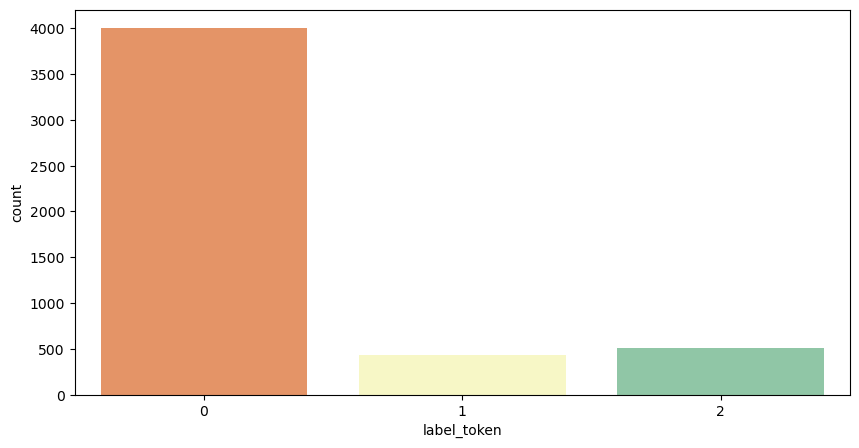

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(cs.label_token, palette='Spectral')

In [21]:
cs.label_token.value_counts()

0    4004
2     507
1     429
Name: label_token, dtype: int64

##### Clustering Tweet Lemma

In [22]:
from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_lemma_kmeans = KMeans(n_clusters= 3)

# Fit model
cl_lemma_kmeans.fit(tfidf_lemma)

# Predict model
y_lemma_kmeans = cl_lemma_kmeans.predict(tfidf_lemma)
cs['label_lemma'] = y_lemma_kmeans

cs

,tweet,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma
0,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,"[ga, sih, skripsi, tuh, diilangin, aja]",0,0
1,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy,"[tolong, infonya, ya, makasih, guy]",0,0
2,gaiss ada yg tau cara nyari jumlah atau dafta...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...,"[gaiss, yg, tau, nyari, daftar, perusahaan, ma...",0,1
3,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...,"[besok, praktik, kalinya, rumah, sakit, jantun...",0,1
4,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,"[ayooo, bantu, sender, nyetok, bahan, tia]",2,0
...,...,...,...,...,...,...
4995,adakah kakak yang ambil konsentrasi sdm aku m...,adakah kakak ambil konsentrasi sdm terkait pkwt,adakah kakak ambil konsentrasi sdm terkait pkwt,"[adakah, kakak, ambil, konsentrasi, sdm, terka...",0,0
4996,di sepertiga malam ini aku mau minta doanya y...,sepertiga malam doanya ya biar artikelku publi...,sepertiga malam doanya ya biar artikelku publi...,"[sepertiga, malam, doanya, ya, biar, artikelku...",0,0
4997,darurat tolong notice sender ini gimanaa ya g...,darurat tolong notice sender gimanaa ya gaiss ...,darurat tolong notice sender gimanaa ya gaiss ...,"[darurat, tolong, notice, sender, gimanaa, ya,...",2,0
4998,gais dos and donts kalo ke perpusnas dongg se...,gais dos donts kalo perpusnas dongg sender br ...,gais do donts kalo perpusnas dongg sender br k...,"[gais, do, donts, kalo, perpusnas, dongg, send...",2,0


c:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label_lemma', ylabel='count'>

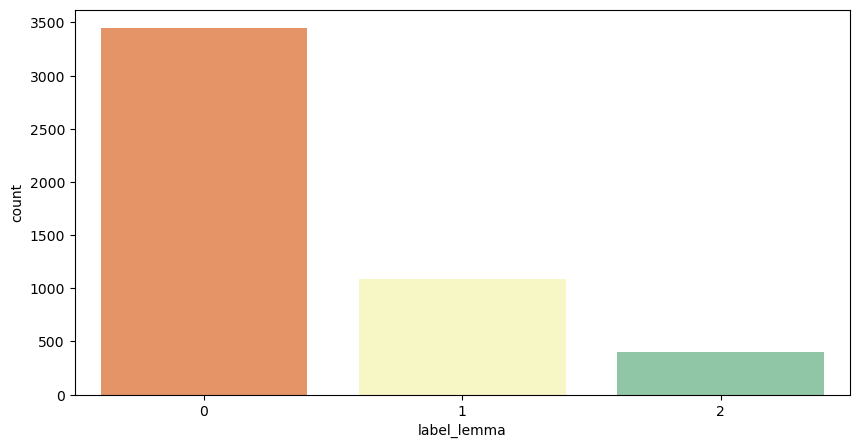

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(cs.label_lemma, palette='Spectral')

In [24]:
cs.label_lemma.value_counts()

0    3449
1    1089
2     402
Name: label_lemma, dtype: int64

#### Polarity Score with Vader

In [25]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


##### Polarity score of tweet lemma

In [26]:
analyzer = SentimentIntensityAnalyzer()
cs['polarity_scores'] = cs['tweet_lemma'].apply(lambda tweet_lemma: analyzer.polarity_scores(tweet_lemma))

cs.head()

,tweet,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma,polarity_scores
0,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,"[ga, sih, skripsi, tuh, diilangin, aja]",0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy,"[tolong, infonya, ya, makasih, guy]",0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,gaiss ada yg tau cara nyari jumlah atau dafta...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...,"[gaiss, yg, tau, nyari, daftar, perusahaan, ma...",0,1,"{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp..."
3,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...,"[besok, praktik, kalinya, rumah, sakit, jantun...",0,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,"[ayooo, bantu, sender, nyetok, bahan, tia]",2,0,"{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'comp..."


In [27]:
cs['compound']  = cs['polarity_scores'].apply(lambda score_dict: score_dict['compound'])

cs.head()

,tweet,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma,polarity_scores,compound
0,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,"[ga, sih, skripsi, tuh, diilangin, aja]",0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy,"[tolong, infonya, ya, makasih, guy]",0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,gaiss ada yg tau cara nyari jumlah atau dafta...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...,"[gaiss, yg, tau, nyari, daftar, perusahaan, ma...",0,1,"{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp...",0.5106
3,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...,"[besok, praktik, kalinya, rumah, sakit, jantun...",0,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,"[ayooo, bantu, sender, nyetok, bahan, tia]",2,0,"{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'comp...",0.5106


it is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

positive sentiment: compound score >= 0.5

neutral sentiment: (compound score > -0.5) and (compound score < 0.5)

negative sentiment: compound score <= -0.5

In [28]:
cs['label_comp'] = cs['compound'].apply(lambda x : 'positif' if x >=0.5 else ('neutral' if x >-0.5 and x <0.5 else 'negatif'))
cs.head()

,tweet,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma,polarity_scores,compound,label_comp
0,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,"[ga, sih, skripsi, tuh, diilangin, aja]",0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy,"[tolong, infonya, ya, makasih, guy]",0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2,gaiss ada yg tau cara nyari jumlah atau dafta...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...,"[gaiss, yg, tau, nyari, daftar, perusahaan, ma...",0,1,"{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp...",0.5106,positif
3,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...,"[besok, praktik, kalinya, rumah, sakit, jantun...",0,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,"[ayooo, bantu, sender, nyetok, bahan, tia]",2,0,"{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'comp...",0.5106,positif


In [29]:
print(cs.label_comp.value_counts())

neutral    4568
positif     336
negatif      36
Name: label_comp, dtype: int64


In [42]:
cs[cs['label_comp'] == 'negatif'].head(20)

,tweet,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma,polarity_scores,compound,label_comp,sentiment_token,sentiment_lemma
139,guys bole minta semangatnya ga jujur aku lg c...,guys bole semangatnya ga jujur lg cape bgt lg ...,guy bole semangatnya ga jujur lg cape bgt lg m...,"[guy, bole, semangatnya, ga, jujur, lg, cape, ...",0,0,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp...",-0.5994,negatif,Neutral,Neutral
265,selamat malam ada yang mau isi kuesioner mama...,selamat malam isi kuesioner mamah cryber crime...,selamat malam isi kuesioner mamah cryber crime...,"[selamat, malam, isi, kuesioner, mamah, cryber...",1,2,"{'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'comp...",-0.5423,negatif,Positif,Negatif
273,wktu gw tinggal minggu buat ikut daftar semp...,wktu gw tinggal minggu daftar sempro tpi gw ml...,wktu gw tinggal minggu daftar sempro tpi gw ml...,"[wktu, gw, tinggal, minggu, daftar, sempro, tp...",0,0,"{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'comp...",-0.6808,negatif,Neutral,Neutral
343,kirain cuma dikampus gw yg pegawai² tu birek ...,kirain dikampus gw yg pegawai² tu birek fk dep...,kirain dikampus gw yg pegawai² tu birek fk dep...,"[kirain, dikampus, gw, yg, pegawai, ², tu, bir...",0,1,"{'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp...",-0.6486,negatif,Neutral,Positif
518,laptop sender rusak jadi sender ngerjain skri...,laptop sender rusak sender ngerjain skripsi pa...,laptop sender rusak sender ngerjain skripsi pa...,"[laptop, sender, rusak, sender, ngerjain, skri...",2,0,"{'neg': 0.208, 'neu': 0.792, 'pos': 0.0, 'comp...",-0.6705,negatif,Negatif,Neutral
1249,guys hamdalah aku senin sempro doain yaaa sem...,guys hamdalah senin sempro doain yaaa semoga d...,guy hamdalah senin sempro doain yaaa semoga di...,"[guy, hamdalah, senin, sempro, doain, yaaa, se...",0,0,"{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'comp...",-0.5106,negatif,Neutral,Neutral
1281,hallo mau nanya disini ada ga ya yang skripsi...,hallo nanya ga ya skripsinya ngebahas financia...,hallo nanya ga ya skripsinya ngebahas financia...,"[hallo, nanya, ga, ya, skripsinya, ngebahas, f...",0,0,"{'neg': 0.404, 'neu': 0.596, 'pos': 0.0, 'comp...",-0.7269,negatif,Neutral,Neutral
1449,kalian kalo stress dan pusing karena perkuliah...,kalo stress pusing perkuliahan ngapain stress ...,kalo stress pusing perkuliahan ngapain stress ...,"[kalo, stress, pusing, perkuliahan, ngapain, s...",0,0,"{'neg': 0.384, 'neu': 0.616, 'pos': 0.0, 'comp...",-0.6808,negatif,Neutral,Neutral
1482,guys kalau critical review dari jurnal peneli...,guys critical review jurnal penelitian yg crit...,guy critical review jurnal penelitian yg criti...,"[guy, critical, review, jurnal, penelitian, yg...",0,1,"{'neg': 0.386, 'neu': 0.614, 'pos': 0.0, 'comp...",-0.5267,negatif,Neutral,Positif
1530,stlh struggle mempertahankan kewarasan di era...,stlh struggle mempertahankan kewarasan era gem...,stlh struggle mempertahankan kewarasan era gem...,"[stlh, struggle, mempertahankan, kewarasan, er...",0,0,"{'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'comp...",-0.6597,negatif,Neutral,Neutral


In [43]:
cs[cs['label_comp'] == 'positif'].head(20)

,tweet,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma,polarity_scores,compound,label_comp,sentiment_token,sentiment_lemma
2,gaiss ada yg tau cara nyari jumlah atau dafta...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...,"[gaiss, yg, tau, nyari, daftar, perusahaan, ma...",0,1,"{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp...",0.5106,positif,Neutral,Positif
4,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,"[ayooo, bantu, sender, nyetok, bahan, tia]",2,0,"{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'comp...",0.5106,positif,Negatif,Neutral
5,spek laptop gini buat anak arsi cukup gak tia,spek laptop gini anak arsi gak tia,spek laptop gini anak arsi gak tia,"[spek, laptop, gini, anak, arsi, gak, tia]",0,0,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.5106,positif,Neutral,Neutral
23,gaissender butuh saran kalian mending gas aja...,gaissender butuh saran mending gas aja nyerahi...,gaissender butuh saran mending gas aja nyerahi...,"[gaissender, butuh, saran, mending, gas, aja, ...",0,0,"{'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'comp...",0.5106,positif,Neutral,Neutral
37,halo kak ada kakak kakak upi yang masi bangun...,halo kak kakak kakak upi masi bangun ga ya but...,halo kak kakak kakak upi masi bangun ga ya but...,"[halo, kak, kakak, kakak, upi, masi, bangun, g...",0,0,"{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.5106,positif,Neutral,Neutral
93,help me please makasih yang udh jawab,help please makasih udh,help please makasih udh,"[help, please, makasih, udh]",0,0,"{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp...",0.6124,positif,Neutral,Neutral
94,guys ada yg tau gk cara supaya video keupload...,guys yg tau gk video keupload reels ig dr td g...,guy yg tau gk video keupload reel ig dr td gag...,"[guy, yg, tau, gk, video, keupload, reel, ig, ...",0,1,"{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compou...",0.5106,positif,Neutral,Positif
118,kalo semisal di kos kalian fasilitas dan temp...,kalo kos fasilitas kemana strategis tp sinyaln...,kalo ko fasilitas kemana strategis tp sinyalny...,"[kalo, ko, fasilitas, kemana, strategis, tp, s...",0,0,"{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp...",0.5994,positif,Neutral,Neutral
127,kesel gimana mau lulus cepet di tengahtengah ...,kesel gimana lulus cepet tengahtengah ketidakw...,kesel gimana lulu cepet tengahtengah ketidakwa...,"[kesel, gimana, lulu, cepet, tengahtengah, ket...",2,0,"{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'comp...",0.5994,positif,Negatif,Neutral
163,kalian yang baik dan jago banget bahasa inggr...,jago banget bahasa inggris bantu sender artiin...,jago banget bahasa inggris bantu sender artiin...,"[jago, banget, bahasa, inggris, bantu, sender,...",0,0,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compou...",0.5574,positif,Neutral,Neutral


##### Label Token Prediction with kmeans

In [30]:
cs.label_token.value_counts()

0    4004
2     507
1     429
Name: label_token, dtype: int64

In [31]:
def sentiment_tweet_token(tt):
    if tt==2:
        return "Negatif"
    elif tt==0:
        return "Neutral"
    else:
        return 'Positif'

cs['sentiment_token'] = cs['label_token'].apply(sentiment_tweet_token)

cs.head()

,tweet,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma,polarity_scores,compound,label_comp,sentiment_token
0,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,"[ga, sih, skripsi, tuh, diilangin, aja]",0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,Neutral
1,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy,"[tolong, infonya, ya, makasih, guy]",0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,Neutral
2,gaiss ada yg tau cara nyari jumlah atau dafta...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...,"[gaiss, yg, tau, nyari, daftar, perusahaan, ma...",0,1,"{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp...",0.5106,positif,Neutral
3,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...,"[besok, praktik, kalinya, rumah, sakit, jantun...",0,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,Neutral
4,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,"[ayooo, bantu, sender, nyetok, bahan, tia]",2,0,"{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'comp...",0.5106,positif,Negatif


##### Sentiment Lemma Prediction with KMeans

In [32]:
cs.label_lemma.value_counts()

0    3449
1    1089
2     402
Name: label_lemma, dtype: int64

In [47]:
def sentiment_tweet_lemma(tl):
    if tl==1:
        return "Negatif"
    elif tl==0:
        return "Neutral"
    else:
        return 'Positif'

cs['sentiment_lemma'] = cs['label_lemma'].apply(sentiment_tweet_lemma)

cs.head()

,tweet,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma,polarity_scores,compound,label_comp,sentiment_token,sentiment_lemma
0,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,"[ga, sih, skripsi, tuh, diilangin, aja]",0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,Neutral,Neutral
1,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy,"[tolong, infonya, ya, makasih, guy]",0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,Neutral,Neutral
2,gaiss ada yg tau cara nyari jumlah atau dafta...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...,"[gaiss, yg, tau, nyari, daftar, perusahaan, ma...",0,1,"{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp...",0.5106,positif,Neutral,Negatif
3,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...,"[besok, praktik, kalinya, rumah, sakit, jantun...",0,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,Neutral,Negatif
4,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,"[ayooo, bantu, sender, nyetok, bahan, tia]",2,0,"{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'comp...",0.5106,positif,Negatif,Neutral


In [48]:
print('===================TOKEN=================\n')
print(cs.sentiment_token.value_counts())
print('==============LEMMATIZATION==============\n')
print(cs.sentiment_lemma.value_counts())
print('=================POLARITY SCORE================\n')
print(cs.label_comp.value_counts())

===================TOKEN=================

Neutral    4004
Negatif     507
Positif     429
Name: sentiment_token, dtype: int64
==============LEMMATIZATION==============

Neutral    3449
Negatif    1089
Positif     402
Name: sentiment_lemma, dtype: int64
=================POLARITY SCORE================

neutral    4568
positif     336
negatif      36
Name: label_comp, dtype: int64


#### Modeling

In [49]:
# ekstraksi fitur

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cs['tweet_token'], cs['sentiment_lemma'], test_size=0.2, random_state=50)

In [50]:
# TF IDF vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train.astype('U'))

X_test = vectorizer.transform(X_test.astype('U'))

##### Naive Bayes

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_mnb_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_mnb_train = accuracy_score(y_train, y_mnb_pred_train)

# Prediksi dengan data training
y_mnb_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_mnb_test = accuracy_score(y_test, y_mnb_pred_test)

print('Multinomial Naive Bayes\n')
# Print hasil evaluasi
print(f'Hasil perhitungan akurasi Data Train : {acc_mnb_train}')
print(f'Hasil perhitungan akurasi Data Test  : {acc_mnb_test}')
# evaluation

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_mnb_pred_test))

print(confusion_matrix(y_test, y_mnb_pred_test))

Multinomial Naive Bayes

Hasil perhitungan akurasi Data Train : 0.7717611336032388
Hasil perhitungan akurasi Data Test  : 0.7560728744939271
              precision    recall  f1-score   support

     Negatif       1.00      0.02      0.03       197
     Neutral       0.75      1.00      0.86       713
     Positif       0.97      0.40      0.56        78

    accuracy                           0.76       988
   macro avg       0.91      0.47      0.48       988
weighted avg       0.82      0.76      0.67       988

[[  3 193   1]
 [  0 713   0]
 [  0  47  31]]


##### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Initiate Model
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_gini = DecisionTreeClassifier(criterion='gini')

# Fit model
# Entropy
dt_entropy.fit(X_train, y_train)
y_pred_entropy_train = dt_entropy.predict(X_train)
y_pred_entropy = dt_entropy.predict(X_test)

# Gini
dt_gini.fit(X_train, y_train)
y_pred_gini_train = dt_gini.predict(X_train)
y_pred_gini = dt_gini.predict(X_test)

# Evaluasi
# Entropy
acc_entropy_train = accuracy_score(y_train, y_pred_entropy_train)
acc_entropy = accuracy_score(y_test, y_pred_entropy)

# Gini
acc_gini_train = accuracy_score(y_train, y_pred_gini_train)
acc_gini = accuracy_score(y_test, y_pred_gini)
print('Decision Tree Entropy')
print(f'Akurasi Entropy Train: {acc_entropy_train}')
print(f'Akurasi Entropy: {acc_entropy}')
print(classification_report(y_test, y_pred_entropy))
print(confusion_matrix(y_test, y_pred_entropy))
print('\n')
print('Decision Tree Gini')
print(f'Akurasi Gini Train: {acc_gini_train}')
print(f'Akurasi Gini: {acc_gini}')
print(classification_report(y_test, y_pred_gini))
print(confusion_matrix(y_test, y_pred_gini))

Decision Tree Entropy
Akurasi Entropy Train: 1.0
Akurasi Entropy: 0.9433198380566802
              precision    recall  f1-score   support

     Negatif       0.92      0.96      0.94       197
     Neutral       0.98      0.96      0.97       713
     Positif       0.70      0.73      0.72        78

    accuracy                           0.94       988
   macro avg       0.87      0.88      0.88       988
weighted avg       0.94      0.94      0.94       988

[[189   1   7]
 [ 10 686  17]
 [  6  15  57]]


Decision Tree Gini
Akurasi Gini Train: 1.0
Akurasi Gini: 0.9352226720647774
              precision    recall  f1-score   support

     Negatif       0.92      0.95      0.94       197
     Neutral       0.98      0.95      0.96       713
     Positif       0.65      0.77      0.70        78

    accuracy                           0.94       988
   macro avg       0.85      0.89      0.87       988
weighted avg       0.94      0.94      0.94       988

[[187   5   5]
 [  8 677  28]

##### SVC

In [53]:
# Model using Linear SVC

from sklearn.svm import LinearSVC

# Inisiasi LinearSVC
lsvc = LinearSVC()

# Fit model
lsvc.fit(X_train, y_train)

# Prediksi dengan data training
y_lin_pred_train = lsvc.predict(X_train)

# Evaluasi akurasi data training
acc_lin_train = accuracy_score(y_train, y_lin_pred_train)

# Prediksi dengan data training
y_lin_pred_test = lsvc.predict(X_test)

# Evaluasi akurasi data training
acc_lin_test = accuracy_score(y_test, y_lin_pred_test)

# Print hasil evaluasi
print('Linear Support Vector')
print(f'Hasil perhitungan akurasi Data Train : {acc_lin_train}')
print(f'Hasil perhitungan akurasi Data Test  : {acc_lin_test}')
print(classification_report(y_test, y_lin_pred_test))
print(confusion_matrix(y_test, y_lin_pred_test))

Linear Support Vector
Hasil perhitungan akurasi Data Train : 1.0
Hasil perhitungan akurasi Data Test  : 0.9706477732793523
              precision    recall  f1-score   support

     Negatif       0.95      0.98      0.96       197
     Neutral       0.98      0.98      0.98       713
     Positif       0.91      0.87      0.89        78

    accuracy                           0.97       988
   macro avg       0.95      0.94      0.94       988
weighted avg       0.97      0.97      0.97       988

[[193   4   0]
 [  8 698   7]
 [  3   7  68]]


In [54]:
from sklearn.svm import SVC

# Inisiasi RBFSVC
rbf = SVC(kernel='rbf')

# Fit model
rbf.fit(X_train, y_train)

# Prediksi dengan data training
y_rbf_pred_train = rbf.predict(X_train)

# Evaluasi akurasi data training
acc_rbf_train = accuracy_score(y_train, y_rbf_pred_train)

# Prediksi dengan data training
y_rbf_pred_test = rbf.predict(X_test)

# Evaluasi akurasi data training
acc_rbf_test = accuracy_score(y_test, y_rbf_pred_test)

# Print hasil evaluasi
print('RBF Support Vector')
print(f'Hasil perhitungan akurasi Data Train : {acc_rbf_train}')
print(f'Hasil perhitungan akurasi Data Test  : {acc_rbf_test}')
print(classification_report(y_test, y_rbf_pred_test))
print(confusion_matrix(y_test, y_rbf_pred_test))

RBF Support Vector
Hasil perhitungan akurasi Data Train : 1.0
Hasil perhitungan akurasi Data Test  : 0.9757085020242915
              precision    recall  f1-score   support

     Negatif       0.96      0.98      0.97       197
     Neutral       0.98      0.99      0.99       713
     Positif       0.97      0.82      0.89        78

    accuracy                           0.98       988
   macro avg       0.97      0.93      0.95       988
weighted avg       0.98      0.98      0.98       988

[[193   4   0]
 [  4 707   2]
 [  3  11  64]]


#### New Data Prediction and Evaluation

In [2]:
import twint
import nest_asyncio
nest_asyncio.apply()

# inisiasi obyek
c = twint.Config()

# config scrap
c.Username = "collegemenfess"
c.Since = "2022-12-26"
c.Until = "2022-12-29"
c.Limit = 500
c.Store_csv = True
c.Output = "colle_scrap_new.csv"

# run scrap
twint.run.Search(c)

1608251237748854784 2022-12-29 06:59:09 +0700 <collegemenfess> [cm] BELI atau TIDAK printer posisi aku lg ngerjain laporan magang dan semester depan ngerjain TA.
1608247740932427778 2022-12-29 06:45:15 +0700 <collegemenfess> [cm] kan aku besok selesai magang, enaknya ngasih org kantor apa ya yang murah tp ttp berkesan gitu (jangan donat)
1608244103250317312 2022-12-29 06:30:48 +0700 <collegemenfess> kerja sampingan di mixue di smt 3 worth it gk yah? btw, untuk  nglamarnya dimana yah? TIA! [cm]
1608243351966584833 2022-12-29 06:27:49 +0700 <collegemenfess> [cm] saran gift sempro simple untuk temen angkatan dong gais, karena kan jumlahnya agak banyak jadi bingung kasih apa, makasih
1608240933254074368 2022-12-29 06:18:12 +0700 <collegemenfess> [CM] tolong saranin buku psikologi forensik
1608240599664324608 2022-12-29 06:16:53 +0700 <collegemenfess> [cm] help help help me bingung bgt😭  https://t.co/KIikOBQBOD
1608238348589756417 2022-12-29 06:07:56 +0700 <collegemenfess> [Cm] ada yg trans

In [55]:
# load data scrapping terbaru
df_new = pd.read_csv('colle_scrap_new.csv')
df_new.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1608251237748854784,1608251237748854784,2022-12-29 06:59:09 SE Asia Standard Time,2022-12-29,06:59:09,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1608247740932427778,1608247740932427778,2022-12-29 06:45:15 SE Asia Standard Time,2022-12-29,06:45:15,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1608244103250317312,1608244103250317312,2022-12-29 06:30:48 SE Asia Standard Time,2022-12-29,06:30:48,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1608243351966584833,1608243351966584833,2022-12-29 06:27:49 SE Asia Standard Time,2022-12-29,06:27:49,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1608240933254074368,1608240933254074368,2022-12-29 06:18:12 SE Asia Standard Time,2022-12-29,06:18:12,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [56]:
# Ambil data tweet baru
new_tweet = df_new['tweet']
new_tweet

0      [cm] BELI atau TIDAK printer posisi aku lg nge...
1      [cm] kan aku besok selesai magang, enaknya nga...
2      kerja sampingan di mixue di smt 3 worth it gk ...
3      [cm] saran gift sempro simple untuk temen angk...
4            [CM] tolong saranin buku psikologi forensik
                             ...                        
495    gais jadi kan sender anak organisasi gitu dan ...
496    [Cm] kalo kkn nya dket rumah tuh boleh ga sih ...
497    Kalo nonaktif gitu bacaannya artinya berhenti ...
498    [cm] haloo apakah ada anak Unair daerah Kenjer...
499    [cm] ini aku harus tetap diem doang seperti ga...
Name: tweet, Length: 500, dtype: object

In [57]:
new_tweet.shape

(500,)

In [58]:
new_tweet = new_tweet.apply(cleaningText)
new_tweet

0       BELI atau TIDAK printer posisi aku lg ngerjai...
1       kan aku besok selesai magang enaknya ngasih o...
2      kerja sampingan di mixue di smt  worth it gk y...
3       saran gift sempro simple untuk temen angkatan...
4                 tolong saranin buku psikologi forensik
                             ...                        
495    gais jadi kan sender anak organisasi gitu dan ...
496     kalo kkn nya dket rumah tuh boleh ga sih tidu...
497    Kalo nonaktif gitu bacaannya artinya berhenti ...
498     haloo apakah ada anak Unair daerah Kenjeran A...
499     ini aku harus tetap diem doang seperti ga ter...
Name: tweet, Length: 500, dtype: object

In [59]:
# lowercase
new_tweet = new_tweet.str.lower()
new_tweet

0       beli atau tidak printer posisi aku lg ngerjai...
1       kan aku besok selesai magang enaknya ngasih o...
2      kerja sampingan di mixue di smt  worth it gk y...
3       saran gift sempro simple untuk temen angkatan...
4                 tolong saranin buku psikologi forensik
                             ...                        
495    gais jadi kan sender anak organisasi gitu dan ...
496     kalo kkn nya dket rumah tuh boleh ga sih tidu...
497    kalo nonaktif gitu bacaannya artinya berhenti ...
498     haloo apakah ada anak unair daerah kenjeran a...
499     ini aku harus tetap diem doang seperti ga ter...
Name: tweet, Length: 500, dtype: object

In [60]:
# remove stopword
new_tweet = new_tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# lemmatization
new_tweet = new_tweet.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
# tokenizer
new_tweet = new_tweet.apply(tweet_token.tokenize)

new_tweet

0      [beli, printer, posisi, lg, ngerjain, laporan,...
1      [besok, selesai, magang, enaknya, ngasih, org,...
2      [kerja, sampingan, mixue, smt, worth, gk, yah,...
3      [saran, gift, sempro, simple, temen, angkatan,...
4           [tolong, saranin, buku, psikologi, forensik]
                             ...                        
495    [gais, sender, anak, organisasi, gitu, penghuj...
496    [kalo, kkn, nya, dket, rumah, tuh, ga, sih, ti...
497    [kalo, nonaktif, gitu, bacaannya, berhenti, ku...
498    [haloo, anak, unair, daerah, kenjeran, cari, k...
499             [diem, doang, ga, apaapa, gimana, plsss]
Name: tweet, Length: 500, dtype: object

##### Naive Bayes Evaluation and Prediction

In [61]:
# Evaluation Naive Bayes
labeling = {'Positif': 'Positif', 'Neutral': 'Neutral', 'Negatif': 'Negatif'}
y_test = y_test.map(labeling)
y_mnb_pred_test = pd.Series(y_mnb_pred_test).map(labeling)

In [62]:
# Vectorize
new_tweet = vectorizer.transform(new_tweet.astype('U'))

# Predict
new_pred = mnb.predict(new_tweet)

# Evaluation
new_pred = pd.Series(new_pred).map(labeling)
print(new_pred)

0      Neutral
1      Neutral
2      Neutral
3      Neutral
4      Neutral
        ...   
495    Neutral
496    Neutral
497    Neutral
498    Neutral
499    Neutral
Length: 500, dtype: object


In [63]:
new_pred.value_counts()

Neutral    489
Positif      9
Negatif      2
dtype: int64

##### SVM Linear Evaluation and Prediction

In [64]:
# Evaluation SVM Linier
y_lin_pred_test = pd.Series(y_lin_pred_test).map(labeling)

In [65]:
# Predict
new_pred_lsvc = lsvc.predict(new_tweet)

# Evaluation
new_pred_lsvc = pd.Series(new_pred_lsvc).map(labeling)
print(new_pred_lsvc)
print(new_pred_lsvc.value_counts())

0      Neutral
1      Neutral
2      Neutral
3      Neutral
4      Neutral
        ...   
495    Neutral
496    Neutral
497    Neutral
498    Neutral
499    Neutral
Length: 500, dtype: object
Neutral    348
Negatif    119
Positif     33
dtype: int64


##### SVM RBF Evaluation and Prediction

In [66]:
# Evaluation SVM RBF
y_rbf_pred_test = pd.Series(y_rbf_pred_test).map(labeling)

In [67]:
# Predict
new_pred_rbf = rbf.predict(new_tweet)

# Evaluation
new_pred_rbf = pd.Series(new_pred_rbf).map(labeling)
print(new_pred_rbf)
print(new_pred_rbf.value_counts())

0      Neutral
1      Neutral
2      Neutral
3      Neutral
4      Neutral
        ...   
495    Neutral
496    Neutral
497    Neutral
498    Neutral
499    Neutral
Length: 500, dtype: object
Neutral    358
Negatif    111
Positif     31
dtype: int64


##### Decision Tree Entropy Evaluation and Prediction

In [68]:
# Evaluation DT Entropy
y_pred_entropy = pd.Series(y_pred_entropy).map(labeling)

In [69]:
# Predict
new_pred_dt_entropy = dt_entropy.predict(new_tweet)

# Evaluation
new_pred_dt_entropy = pd.Series(new_pred_dt_entropy).map(labeling)
print(new_pred_dt_entropy)
print(new_pred_dt_entropy.value_counts())

0      Neutral
1      Neutral
2      Neutral
3      Neutral
4      Neutral
        ...   
495    Neutral
496    Neutral
497    Neutral
498    Neutral
499    Neutral
Length: 500, dtype: object
Neutral    357
Negatif    113
Positif     30
dtype: int64


##### Decision Tree Gini Evaluation and Prediction

In [70]:
# Evaluation DT Gini
y_pred_gini = pd.Series(y_pred_gini).map(labeling)

In [71]:
# Predict
new_pred_dt_gini = dt_gini.predict(new_tweet)

# Evaluation
new_pred_dt_gini = pd.Series(new_pred_dt_gini).map(labeling)
print(new_pred_dt_gini)
print(new_pred_dt_gini.value_counts())

0      Neutral
1      Neutral
2      Neutral
3      Neutral
4      Neutral
        ...   
495    Neutral
496    Neutral
497    Neutral
498    Neutral
499    Neutral
Length: 500, dtype: object
Neutral    344
Negatif    118
Positif     38
dtype: int64


#### Sentiment Prediction Results of all models

In [72]:
print('Naive Bayes')
print(new_pred.value_counts())
print('Linier SVC')
print(new_pred_lsvc.value_counts())
print('RBF')
print(new_pred_rbf.value_counts())
print('DT Entropy')
print(new_pred_dt_entropy.value_counts())
print('DT Gini')
print(new_pred_dt_gini.value_counts())

Naive Bayes
Neutral    489
Positif      9
Negatif      2
dtype: int64
Linier SVC
Neutral    348
Negatif    119
Positif     33
dtype: int64
RBF
Neutral    358
Negatif    111
Positif     31
dtype: int64
DT Entropy
Neutral    357
Negatif    113
Positif     30
dtype: int64
DT Gini
Neutral    344
Negatif    118
Positif     38
dtype: int64


##### Pada hasil di atas diperoleh hasil clusttering paling merata menggunakan model Decision Tree Gini.

In [76]:
result = df_new.copy()
result = df_new.iloc[:,10:11]
result['sentiment_NB'] = new_pred
result['sentiment_LinearSVM'] = new_pred_lsvc
result['sentiment_RBF'] = new_pred_rbf
result['sentiment_EntropyDT'] = new_pred_dt_entropy
result['sentiment_GiniDT'] = new_pred_dt_gini
result

,tweet,sentiment_NB,sentiment_LinearSVM,sentiment_RBF,sentiment_EntropyDT,sentiment_GiniDT
0,[cm] BELI atau TIDAK printer posisi aku lg nge...,Neutral,Neutral,Neutral,Neutral,Neutral
1,"[cm] kan aku besok selesai magang, enaknya nga...",Neutral,Neutral,Neutral,Neutral,Neutral
2,kerja sampingan di mixue di smt 3 worth it gk ...,Neutral,Neutral,Neutral,Neutral,Neutral
3,[cm] saran gift sempro simple untuk temen angk...,Neutral,Neutral,Neutral,Neutral,Neutral
4,[CM] tolong saranin buku psikologi forensik,Neutral,Neutral,Neutral,Neutral,Neutral
...,...,...,...,...,...,...
495,gais jadi kan sender anak organisasi gitu dan ...,Neutral,Neutral,Neutral,Neutral,Neutral
496,[Cm] kalo kkn nya dket rumah tuh boleh ga sih ...,Neutral,Neutral,Neutral,Neutral,Neutral
497,Kalo nonaktif gitu bacaannya artinya berhenti ...,Neutral,Neutral,Neutral,Neutral,Neutral
498,[cm] haloo apakah ada anak Unair daerah Kenjer...,Neutral,Neutral,Neutral,Neutral,Neutral
